In [ ]:
from transformers import GPT2LMHeadModel

model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

In [4]:
for k,v in sd_hf.items():
    print(k,v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

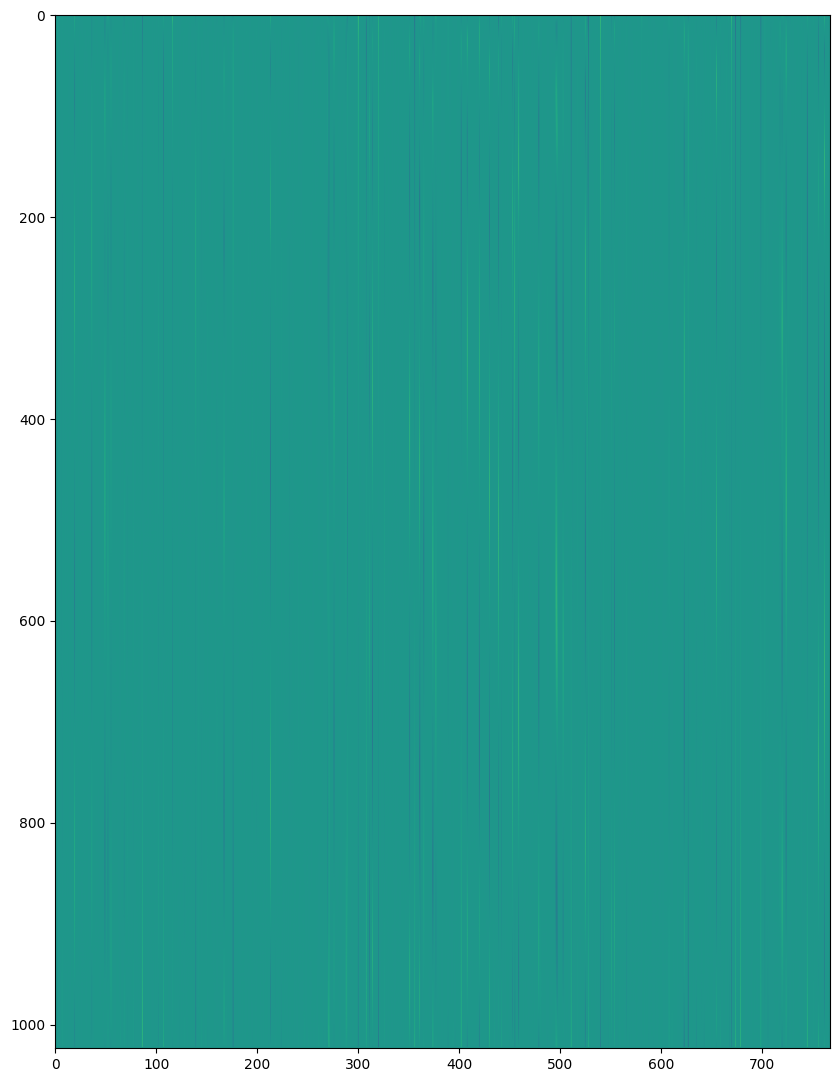

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
plt.imshow(sd_hf['transformer.wpe.weight'])

### in gpt2, the positional embeddings are all learned unlike in transformers paper where they use sinusoidal fixed pos embd. you can see the plotted wpe matrix, there definitely is some structure in it, so the learning process seems to have converged to some form where each channel serves some specific purpose. each row in the above plot is uniquely coded

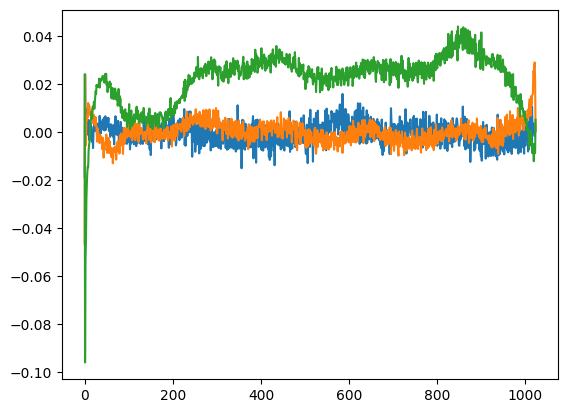

In [37]:
plt.plot(sd_hf['transformer.wpe.weight'][:, 0])
plt.plot(sd_hf['transformer.wpe.weight'][:, 150])
plt.plot(sd_hf['transformer.wpe.weight'][:, 250])

### you can see the pos emb values for three specific channels. the green one only seems to activate after 200th token, and sharply dips after the 800th token

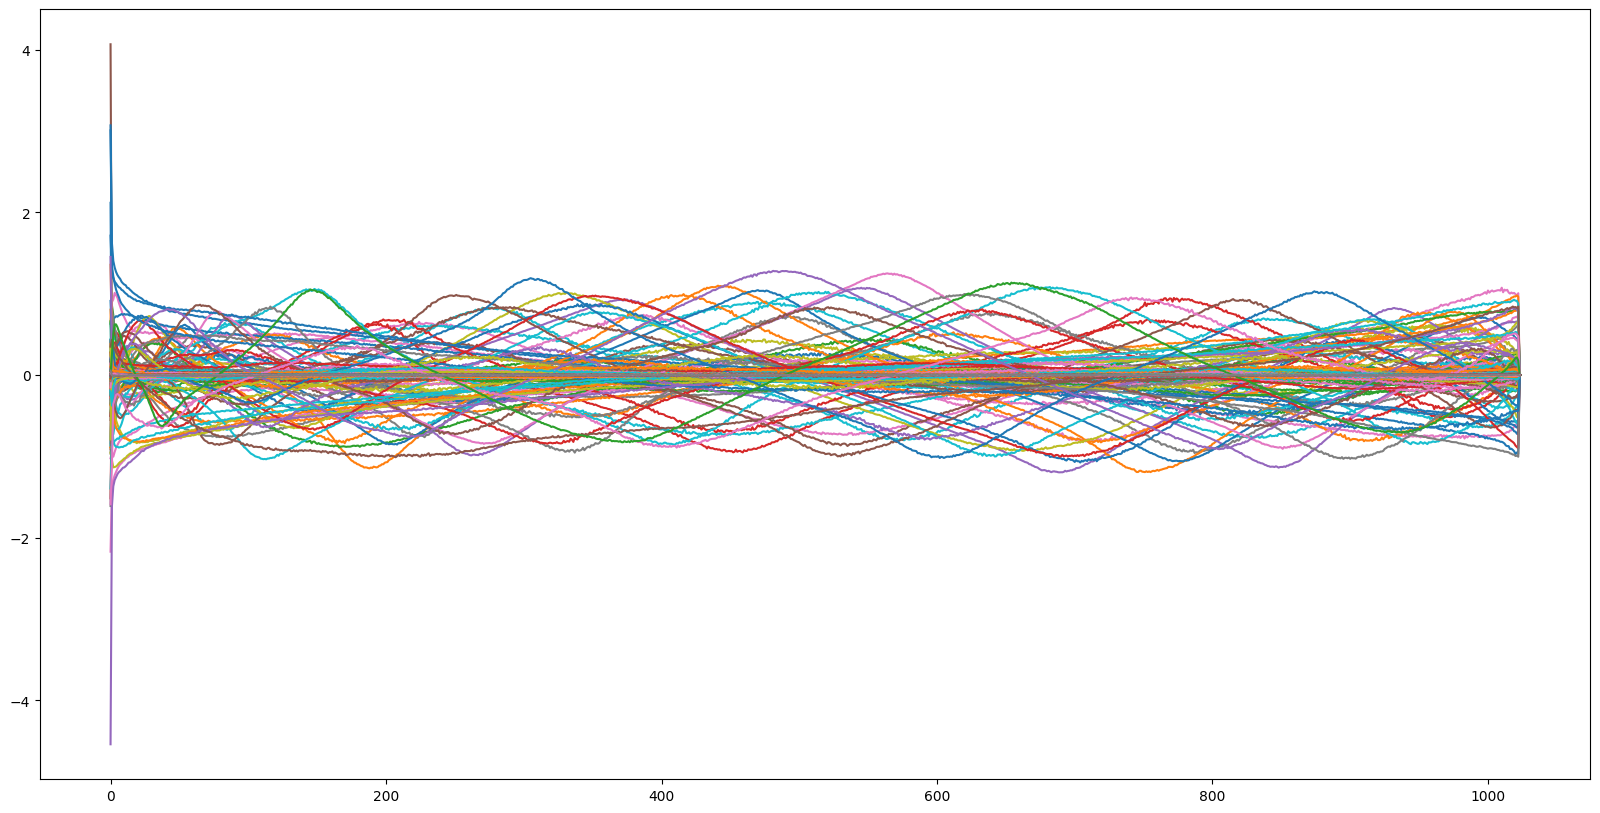

In [62]:
plt.figure(figsize=(20,10))
plt.plot(sd_hf['transformer.wpe.weight'])
plt.show()

### each sinusoidal like curve here represents the positional embeddings for a particular dimension (out of 768 in total). since these weights are learned in gpt2, it is very interesting to see such a pattern form, we see high variance at the initial positions indicating the model assigning high frequencies. you can see that they are slightly jagged, and for the plot above this when we get a closer look they are very jagged, proving that they have warped and optimized to mimic sinusoidal curves but are not perfect curves 

torch.Size([768, 2304])


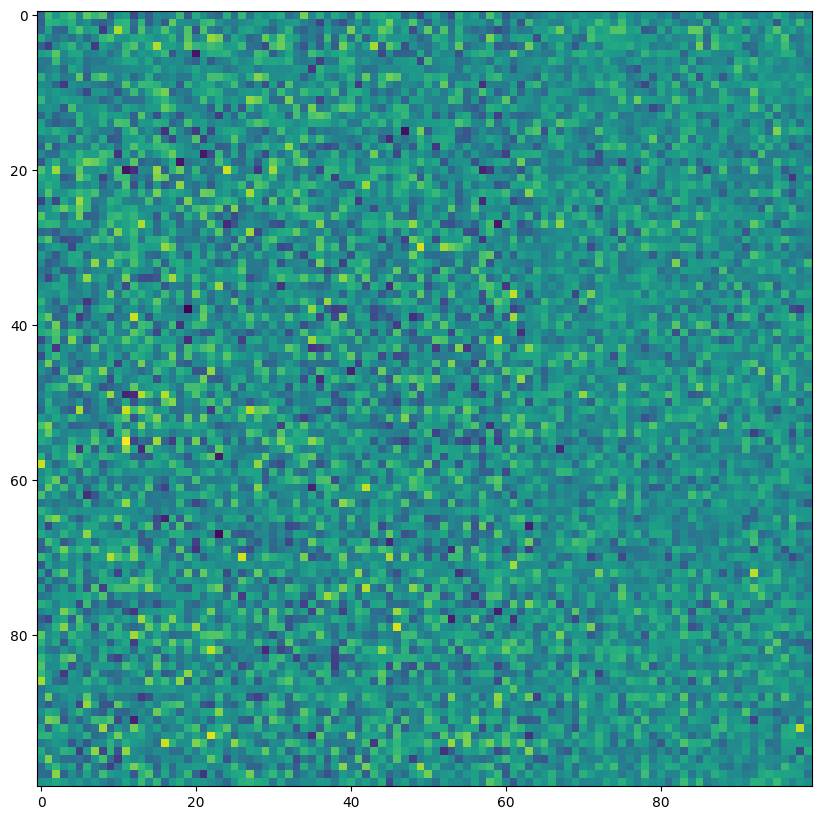

In [72]:
print(sd_hf['transformer.h.1.attn.c_attn.weight'].shape)
plt.figure(figsize=(10,20))
plt.imshow(sd_hf['transformer.h.1.attn.c_attn.weight'][:100, :100])
plt.show()

### first 100 rows and columns attention maps shown as a heatmap to see what the attention scores are attending to